# Data Analysis

In [18]:
import json
import os
from collections import Counter
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wikidata.client import Client

In [2]:
folder_path = 'C:/Users/valep/OneDrive/Documenti/PhD/Conjectures/ADHO23/experiments/data/artworks/'
intermediate_folder_path = 'C:/Users/valep/OneDrive/Documenti/PhD/Conjectures/ADHO23/experiments/intermediate_data/'

# C:/Users/valep/OneDrive/Documenti/PhD/Conjectures/ADHO23/experiments/data/selected_artworks/

## Overall data analysis
Count all classes, properties and entities in the dataset

In [5]:
def count_subjects_statements_classes(folder):
    classes_list, properties_list = [], []
    subjects_n, statements_n = 0, 0
    for filename in tqdm(os.listdir(folder)):
        f = os.path.join(folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        for key in data['entities']:
            subjects_n = subjects_n + 1
            for prop in data['entities'][key]['claims']:
                statements_n = statements_n + 1
                properties_list.append(prop)
                for claim in data['entities'][key]['claims']['P31']:
                    classes_list.append(claim['mainsnak']['datavalue']['value']['id'])

    classes_list = list(set(classes_list))
    classes_n = len(classes_list)
    
    return subjects_n, classes_n, statements_n, properties_list

In [6]:
count_subjects_statements_classes(folder_path)



100%|████████████████████████████████████████████████████████████████████████████| 70745/70745 [13:58<00:00, 84.34it/s]


(2156363,
 6612,
 18924333,
 ['P2671',
  'P31',
  'P1441',
  'P646',
  'P31',
  'P373',
  'P2671',
  'P137',
  'P31',
  'P31',
  'P50',
  'P1433',
  'P577',
  'P18',
  'P2671',
  'P1074',
  'P31',
  'P31',
  'P31',
  'P136',
  'P31',
  'P407',
  'P577',
  'P144',
  'P6216',
  'P2671',
  'P31',
  'P50',
  'P1476',
  'P571',
  'P18',
  'P31',
  'P195',
  'P31',
  'P495',
  'P31',
  'P2671',
  'P31',
  'P31',
  'P31',
  'P2671',
  'P18',
  'P1476',
  'P31',
  'P51',
  'P407',
  'P577',
  'P195',
  'P6216',
  'P50',
  'P179',
  'P144',
  'P495',
  'P31',
  'P577',
  'P407',
  'P2671',
  'P31',
  'P50',
  'P655',
  'P577',
  'P144',
  'P345',
  'P136',
  'P31',
  'P577',
  'P57',
  'P495',
  'P2047',
  'P86',
  'P162',
  'P2671',
  'P31',
  'P50',
  'P577',
  'P123',
  'P212',
  'P2671',
  'P31',
  'P50',
  'P123',
  'P577',
  'P1476',
  'P31',
  'P577',
  'P1476',
  'P136',
  'P50',
  'P31',
  'P577',
  'P1476',
  'P50',
  'P123',
  'P407',
  'P5008',
  'P31',
  'P50',
  'P1476',
  'P577',

## Complex knowledge data analysis

Count all classes, properties and entities involved in complex knowledge statements. Complex knowledge statements in this analysis consist of Non-asserted statements obtained via ranking mechanism, Null-valued statements, Explicitly uncertain marked statements

In [8]:
def isAnotherPreferred(this, list):
    for elem in list:
        if (elem['rank'] == 'preferred' and elem != this):
            return True

def is_non_asserted(claim, claims):
    if claim['rank'] == 'normal':
        if (isAnotherPreferred(claim, claims)):
            return True

    if claim['rank'] == 'deprecated':
        return True
    
def is_null_valued(claim):
    if claim['mainsnak']['snaktype'] == 'novalue':
        return True
    
def has_nature_of_statement(claim):
    count = { "Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q101244": 0, "Q102786": 0, "Q61002": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q1309409": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29023906": 0, "Q29509043": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q23013246": 0, "Q6136054": 0, "Q32188232": 0, "unknown": 0}
    if 'qualifiers' in claim.keys():
        if 'P5102' in claim['qualifiers']:
            for nature in claim['qualifiers']['P5102']:
                if nature['datavalue']['value']['id'] in count.keys():
                    return True

def has_sourcing_circumstances(claim):
    count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0,'Q114369323':0,'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0}
    if 'qualifiers' in claim.keys():
        if 'P1480' in claim['qualifiers']:
            for circumstance in claim['qualifiers']['P1480']:
                if 'datavalue' in circumstance:
                    if circumstance['datavalue']['value']['id'] in count.keys():
                        return True
                    
def explicit_marked_uncertain(claim):
    count = {"Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q101244": 0, "Q102786": 0, "Q61002": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q1309409": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29023906": 0, "Q29509043": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q23013246": 0, "Q6136054": 0, "Q32188232": 0, "unknown": 0}
    circumstances_count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0,'Q114369323':0,'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0}
    unc_terms = count | circumstances_count
    if 'qualifiers' in claim.keys():
        for qualifier in claim['qualifiers']:
            for x in claim['qualifiers'][qualifier]:
                if 'datavalue' in x:
                    try:
                        if x['datavalue']['value']['id'] in unc_terms.keys():
                            return True
                    except:
                        return False

def add_predicates(predicate, selected_claims, claims_by_pred):
    if len(selected_claims) > 0:
        claims_by_pred.update({predicate:selected_claims})
        selected_claims = []
    return selected_claims, claims_by_pred

def construct_data(key, metadata, claims_by_pred, classes_list, data):
    if len(claims_by_pred) > 0:
        metadata.update({'classes':classes_list})
        metadata.update({'claims':claims_by_pred})
        data.update({key:metadata})
    return data

def write_json(out_path, filename, data):
    with open(out_path + filename + '.json', 'w') as f:
        json.dump(data, f, indent=4)   

In [ ]:
na_data, nv_data, ns_data, nc_data = {}, {}, {}, {}

for filename in tqdm(os.listdir(folder_path)):
    f = os.path.join(folder_path, filename)
    json_file = open(f)
    data = json.load(json_file)
    for key in data['entities']:
        classes_list =  []
        na_metadata, nv_metadata, ns_metadata, nc_metadata = {},{},{},{}
        na_selected_claims, nv_selected_claims, ns_selected_claims, nc_selected_claims = [], [], [], []
        na_claims_by_pred, nv_claims_by_pred, ns_claims_by_pred, nc_claims_by_pred  = {}, {}, {}, {}
        for predicate in data['entities'][key]['claims']:
            claims = data['entities'][key]['claims'][predicate]
            for claim in claims:
                # get list of classes
                if predicate == 'P31':
                    classes_list.append(claim['mainsnak']['datavalue']['value']['id'])
                if (is_non_asserted(claim, claims)):
                    na_selected_claims.append(claim)
                if (is_null_valued(claim)):
                    nv_selected_claims.append(claim)
                if (has_nature_of_statement(claim)):
                    ns_selected_claims.append(claim)
                if (has_sourcing_circumstances(claim)):
                    nc_selected_claims.append(claim)
                
            na_selected_claims, na_claims_by_pred = add_predicates(predicate, na_selected_claims, na_claims_by_pred)
            nv_selected_claims, nv_claims_by_pred = add_predicates(predicate, nv_selected_claims, nv_claims_by_pred)
            ns_selected_claims, ns_claims_by_pred = add_predicates(predicate, ns_selected_claims, ns_claims_by_pred)
            nc_selected_claims, nc_claims_by_pred = add_predicates(predicate, nc_selected_claims, nc_claims_by_pred)

        na_data = construct_data(key, na_metadata, na_claims_by_pred, classes_list, na_data)
        nv_data = construct_data(key, nv_metadata, nv_claims_by_pred, classes_list, nv_data)
        ns_data = construct_data(key, ns_metadata, ns_claims_by_pred, classes_list, ns_data)
        nc_data = construct_data(key, nc_metadata, nc_claims_by_pred, classes_list, nc_data)
            
write_json('intermediate_data/', 'non-asserted', na_data)    
write_json('intermediate_data/', 'null-valued', nv_data)    
write_json('intermediate_data/', 'natures', ns_data)  
write_json('intermediate_data/', 'sourcing-circumstances', nc_data) 

## Non-asserted statements analysis

In [25]:
# parse json
json_file = open(intermediate_folder_path + 'non-asserted.json')
na_data = json.load(json_file)

na_classes_list, na_entities_list, na_claims_list, na_properties_list, na_reasons_list = [], [], [], [], []
deprecated_prop_list, normal_prop_list = [], []
for key in na_data:
    na_entities_list.append(key)
    na_classes_list.extend(na_data[key]['classes'])
    for predicate in na_data[key]['claims']:
        for claim in na_data[key]['claims'][predicate]: 
            na_claims_list.append(claim['id'])
            na_properties_list.append(predicate)
            if claim['rank'] == 'normal':
                normal_prop_list.append(predicate)
            if claim['rank'] == 'deprecated':
                deprecated_prop_list.append(predicate)
            try:
                if claim['qualifiers']['P2241']:
                    na_reasons_list.append(claim['id'])
            except:
                None

# entities analysis
print('number of entities: ', len(na_entities_list))

# statements analysis
print('number of statements: ', len(na_claims_list))

# statements count by rank
print('number of normal ranked statements: ', len(normal_prop_list))
print('number of deprecated ranked statements: ', len(deprecated_prop_list))


# reason for deprecation (qualifier) analysis
print('number of deprecated statements with an annotated reason: ', len(na_reasons_list))

# predicates analysis
na_properties_set = list(set(na_properties_list))
print('number of (univoque) properties: ', len(na_properties_set))
na_properties_count = Counter(na_properties_list)
na_properties_count = sorted(na_properties_count, key=na_properties_count.get, reverse=True)[:10]
print('top 10 properties: ', na_properties_count)

# classes analysis
na_classes_count = Counter(na_classes_list)
na_classes_count = sorted(na_classes_count, key=na_classes_count.get, reverse=True)[:10]
na_classes_set = list(set(na_classes_list))
print('number of (univoque) classes: ', len(na_classes_set))
print('top 10 classes: ', na_classes_count)

number of entities:  16290
number of statements:  29431
number of normal ranked statements:  24099
number of deprecated ranked statements:  5332
number of deprecated statements with an annotated reason:  2046
number of (univoque) properties:  322
top 10 properties:  ['P1476', 'P131', 'P18', 'P170', 'P31', 'P217', 'P195', 'P180', 'P276', 'P571']
number of (univoque) classes:  1119
top 10 classes:  ['Q3305213', 'Q7725634', 'Q179700', 'Q4989906', 'Q28045079', 'Q7321974', 'Q860861', 'Q125191', 'Q693', 'Q575759']


## Null-valued statements 

In [11]:
# parse json
json_file = open(intermediate_folder_path + 'null-valued.json')
nv_data = json.load(json_file)

nv_classes_list, nv_entities_list, nv_claims_list, nv_properties_list, nv_reasons_list = [], [], [], [], []
for key in nv_data:
    nv_entities_list.append(key)
    nv_classes_list.extend(nv_data[key]['classes'])
    for predicate in nv_data[key]['claims']:
        for claim in nv_data[key]['claims'][predicate]: 
            nv_claims_list.append(claim['id'])
            nv_properties_list.append(predicate)


# entities analysis
print('number of entities: ', len(nv_entities_list))

# statements analysis
print('number of statements: ', len(nv_claims_list))

# predicates analysis
nv_properties_set = list(set(nv_properties_list))
print('number of (univoque) properties: ', len(nv_properties_set))
nv_properties_count = Counter(nv_properties_list)
nv_properties_count = sorted(nv_properties_count, key=nv_properties_count.get, reverse=True)[:10]
print('top 10 properties: ', nv_properties_count)

# classes analysis
nv_classes_count = Counter(nv_classes_list)
nv_classes_count = sorted(nv_classes_count, key=nv_classes_count.get, reverse=True)[:10]
nv_classes_set = list(set(nv_classes_list))
print('number of (univoque) classes: ', len(nv_classes_set))
print('top 10 classes: ', nv_classes_count)

number of entities:  3740
number of statements:  3912
number of (univoque) properties:  156
top 10 properties:  ['P170', 'P50', 'P2969', 'P1476', 'P9394', 'P5208', 'P162', 'P155', 'P528', 'P347']
number of (univoque) classes:  378
top 10 classes:  ['Q11060274', 'Q7725634', 'Q3305213', 'Q72996181', 'Q11835431', 'Q19389637', 'Q18218093', 'Q860861', 'Q63141557', 'Q309481']


# Explicitly uncertain marked statements

### Statements with a nature of statement analysis

In [21]:
count = {"Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q101244": 0, "Q102786": 0, "Q61002": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q1309409": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29023906": 0, "Q29509043": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q23013246": 0, "Q6136054": 0, "Q32188232": 0, "unknown": 0}
selected_natures = { "Q27058": "Approximation", "Q41719": "Hypothesis", "Q11169": "Question Mark", "Q29485": "Error", "Q357662": "work in process", "Q603908": "to be announced", "Q280943": "deprecation", "Q701040": "annulment", "Q873222": "expulsion", "Q880643": "false statement", "Q1255828": "controversy", "Q3918409": "proposal", "Q13649246": "uncertainty", "Q17024293": "misunderstanding", "Q18603603": "hypothetically", "Q18122778": "presumably", "Q18912752": "disputed", "Q25895909": "cannot be confirmed by other sources", "Q24238356": "unknown", "Q24025284": "sometimes changes", "Q20734200": "not completed", "Q26932615": "statement with potentially incorrect Julian date", "Q28831311": "unconfirmed", "Q28962310": "rarely", "Q28962312": "often", "Q29509080": "unofficial", "Q30230067": "possibly", "Q30108381": "cancelled", "Q37113960": "estimate", "Q45025362": "replaced entity", "Q38131096": "rediscovery", "Q50376823": "expected", "Q56644435": "probably", "Q54943392": "obsolete form", "Q59864995": "optional", "Q73290844": "speculation", "Q84590041": "name change", "Q97161074": "Guesstimate", "Q100349848": "partially", "Q104378399": "dubious", "Q107217620": "unsubstantiated", "Q106466760": "manipulation", "Q107356532": "obsolete", "Q110143752": "sometimes", "Q110290991": "no earlier than", "Q108163": "proposition", "Q5727902": "circa", "Q4895105": "interim", "Q744069": "extrapolation", "Q748250": "prediction", "Q21818619": "near", "Q23013246": "copy", "Q6136054": "guess", "Q32188232": "allegedly"}

# parse json
json_file = open(intermediate_folder_path + 'natures.json')
ns_data = json.load(json_file)

ns_classes_list, ns_entities_list, ns_claims_list, ns_properties_list, ns_reasons_list = [], [], [], [], []
for key in ns_data:
    ns_entities_list.append(key)
    ns_classes_list.extend(ns_data[key]['classes'])
    for predicate in ns_data[key]['claims']:
        for claim in ns_data[key]['claims'][predicate]: 
            ns_claims_list.append(claim['id'])
            ns_properties_list.append(predicate)
            if 'qualifiers' in claim:
                    if 'P5102' in claim['qualifiers']:
                        for elem in claim['qualifiers']['P5102']:
                            nature_id = elem['datavalue']['value']['id']
                            if nature_id in count.keys():
                                count.update({nature_id:count[nature_id] + 1})

# entities analysis
print('number of entities: ', len(ns_entities_list))

# statements analysis
print('number of statements: ', len(ns_claims_list))

# predicates analysis
ns_properties_set = list(set(ns_properties_list))
print('number of (univoque) properties: ', len(ns_properties_set))
ns_properties_count = Counter(ns_properties_list)
ns_properties_count = sorted(ns_properties_count, key=ns_properties_count.get, reverse=True)[:10]
print('top 10 properties: ', ns_properties_count)

# classes analysis
ns_classes_count = Counter(ns_classes_list)
ns_classes_count = sorted(ns_classes_count, key=ns_classes_count.get, reverse=True)[:10]
ns_classes_set = list(set(ns_classes_list))
print('number of (univoque) classes: ', len(ns_classes_set))
print('top 10 classes: ', ns_classes_count)

# natures of statements analysis
print('\n')
print('##### MOST IMPLIED NATURES OF STATEMENTS #####')
for k in sorted(count, key=count.get, reverse=True):
    if k in selected_natures.keys():
        if count[k] > 0:
            print(str(selected_natures[k]), ' (' + str(k) + ') ', str(count[k]))

number of entities:  360
number of statements:  503
number of (univoque) properties:  75
top 10 properties:  ['P571', 'P170', 'P6962', 'P180', 'P176', 'P31', 'P88', 'P50', 'P577', 'P186']
number of (univoque) classes:  145
top 10 classes:  ['Q3305213', 'Q184296', 'Q44740228', 'Q5185279', 'Q7725634', 'Q47451145', 'Q93184', 'Q63872468', 'Q12043905', 'Q22075301']


##### MOST IMPLIED NATURES OF STATEMENTS #####
possibly  (Q30230067)  169
presumably  (Q18122778)  76
circa  (Q5727902)  74
optional  (Q59864995)  40
probably  (Q56644435)  35
Hypothesis  (Q41719)  21
disputed  (Q18912752)  21
expected  (Q50376823)  15
often  (Q28962312)  14
dubious  (Q104378399)  10
partially  (Q100349848)  6
unofficial  (Q29509080)  5
rarely  (Q28962310)  4
Approximation  (Q27058)  2
uncertainty  (Q13649246)  2
hypothetically  (Q18603603)  2
unconfirmed  (Q28831311)  2
extrapolation  (Q744069)  2
cancelled  (Q30108381)  1
rediscovery  (Q38131096)  1
sometimes  (Q110143752)  1
copy  (Q23013246)  1
allegedly  (

### Statements with a sourcing circumstance

In [20]:
circumstances_count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0,'Q114369323':0,'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0}

# parse json
json_file = open(intermediate_folder_path + 'sourcing-circumstances.json')
nc_data = json.load(json_file)

nc_classes_list, nc_entities_list, nc_claims_list, nc_properties_list, nc_reasonc_list = [], [], [], [], []
for key in nc_data:
    nc_entities_list.append(key)
    nc_classes_list.extend(nc_data[key]['classes'])
    for predicate in nc_data[key]['claims']:
        for claim in nc_data[key]['claims'][predicate]: 
            nc_claims_list.append(claim['id'])
            nc_properties_list.append(predicate)
            if 'qualifiers' in claim:
                    if 'P1480' in claim['qualifiers']:
                        for elem in claim['qualifiers']['P1480']:
                            if 'datavalue' in elem:
                                circ_id = elem['datavalue']['value']['id']
                                if circ_id in circumstances_count.keys():
                                    circumstances_count.update({circ_id:circumstances_count[circ_id] + 1})                                 
                                    
# entities analysis
print('number of entities: ', len(nc_entities_list))

# statements analysis
print('number of statements: ', len(nc_claims_list))

# predicates analysis
nc_properties_set = list(set(nc_properties_list))
print('number of (univoque) properties: ', len(nc_properties_set))
nc_properties_count = Counter(nc_properties_list)
nc_properties_count = sorted(nc_properties_count, key=nc_properties_count.get, reverse=True)[:10]
print('top 10 properties: ', nc_properties_count)

# classes analysis
nc_classes_count = Counter(nc_classes_list)
nc_classes_count = sorted(nc_classes_count, key=nc_classes_count.get, reverse=True)[:10]
nc_classes_set = list(set(nc_classes_list))
print('number of (univoque) classes: ', len(nc_classes_set))
print('top 10 classes: ', nc_classes_count)

# sourcing circumstances analysis
print('\n')
print('##### MOST IMPLIED NATURES OF STATEMENTS #####')
# sourcing circumstances analysis
client = Client()           
for k1 in sorted(circumstances_count, key=circumstances_count.get, reverse=True):
    if circumstances_count[k1] > 0:
        entity = client.get(k1, load=True)
        print(entity.label.texts['en'], ' (' + str(k1) + ') ', str(circumstances_count[k1]))

number of entities:  113829
number of statements:  114807
number of (univoque) properties:  104
top 10 properties:  ['P571', 'P170', 'P577', 'P180', 'P625', 'P1120', 'P2048', 'P1071', 'P1326', 'P127']
number of (univoque) classes:  822
top 10 classes:  ['Q3305213', 'Q93184', 'Q11060274', 'Q125191', 'Q860861', 'Q220659', 'Q838948', 'Q18761202', 'Q18219090', 'Q18218093']


##### MOST IMPLIED NATURES OF STATEMENTS #####
circa  (Q5727902)  111087
probably  (Q56644435)  1761
presumably  (Q18122778)  1577
possibly  (Q30230067)  681
disputed  (Q18912752)  131
roughly  (Q60070514)  33
uncertainty  (Q13649246)  23
allegedly  (Q32188232)  10
according to some sources  (Q59783740)  8
hypothetically  (Q18603603)  6
possibly approximate value  (Q21097017)  6
almost surely  (Q1434353)  5
estimate  (Q37113960)  4
expected  (Q50376823)  4
approximation  (Q27058)  3
hypothesis  (Q41719)  3
misattribution  (Q105675146)  3
attribution  (Q2132119)  3
estimation  (Q791801)  2
terminus ante quem  (Q3984452)

## Comparative analysis over the surveyed representation methods

### Percentages of complex knowledge statements

In [17]:
tot_uncertain_statements = len(na_claims_list) + len(nv_claims_list) + len(ns_claims_list) + len(nc_claims_list)

print('Percentage of non-asserted statements out of tot uncertain statements: ', len(na_claims_list) * 100 / tot_uncertain_statements)
print('Percentage of null-valued statements out of tot uncertain statements: ', len(nv_claims_list) * 100 / tot_uncertain_statements)
print('Percentage of natures of statements out of tot uncertain statements: ', len(ns_claims_list) * 100 / tot_uncertain_statements)
print('Percentage of sourcing circumstances out of tot uncertain statements: ', len(nc_claims_list) * 100 / tot_uncertain_statements)

#print('Percentage of uncertain statenments out of tot statements: ', tot_uncertain_statements * 100 / statements_n )

Percentage of non-asserted statements out of tot uncertain statements:  19.798456808809778
Percentage of null-valued statements out of tot uncertain statements:  2.6316320558616373
Percentage of natures of statements out of tot uncertain statements:  0.3383719131130889
Percentage of sourcing circumstances out of tot uncertain statements:  77.23153922221549


### Sets intersections

In [22]:
def intersection_between_sets(claims_list1, claims_list2):
    n_intersection = len(set(claims_list1) & set(claims_list2))
    n_union = len(set(claims_list1) | set(claims_list2))
    percentage = round(n_intersection * 100 / n_union, 3)
    return percentage

print('non-asserted & null-valued: ', intersection_between_sets(na_claims_list, nv_claims_list), '%')
print('non-asserted & natures: ', intersection_between_sets(na_claims_list, ns_claims_list), '%')
print('non-asserted & circumstances: ', intersection_between_sets(na_claims_list, nc_claims_list), '%')
print('null-valued & natures: ', intersection_between_sets(nv_claims_list, ns_claims_list), '%')
print('null-valued & circumstances: ', intersection_between_sets(nv_claims_list, nc_claims_list), '%')
print('natures & circumstances: ', intersection_between_sets(ns_claims_list, nc_claims_list), '%')

non-asserted & null-valued:  0.036 %
non-asserted & natures:  0.057 %
non-asserted & circumstances:  0.09 %
null-valued & natures:  0.0 %
null-valued & circumstances:  0.0 %
natures & circumstances:  0.003 %


### Most frequent properties with surveyed methods

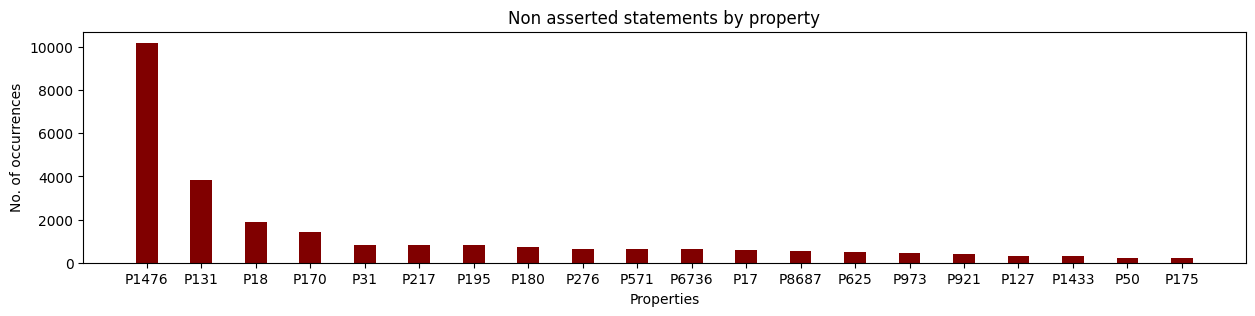

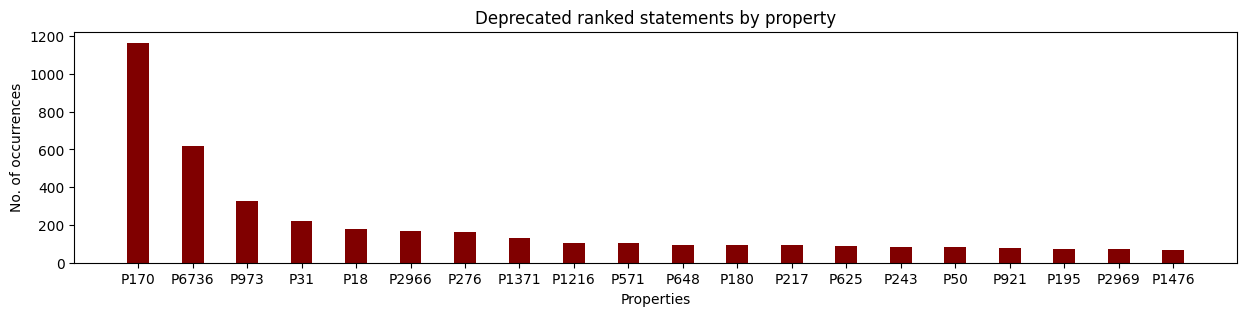

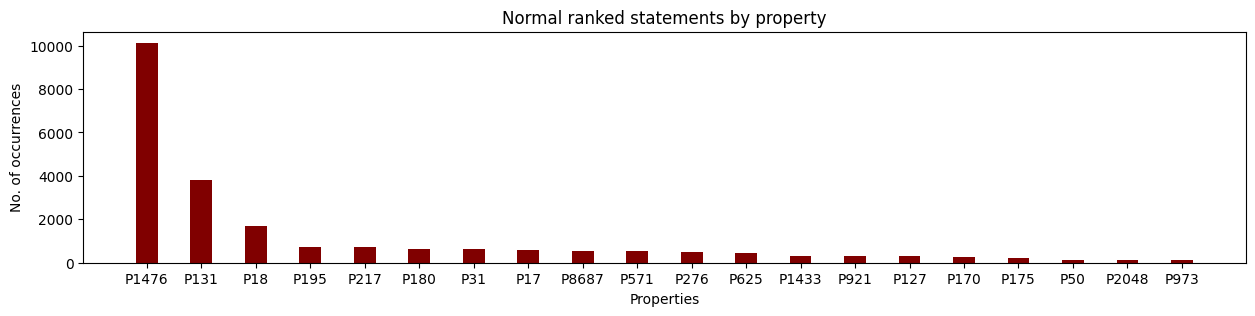

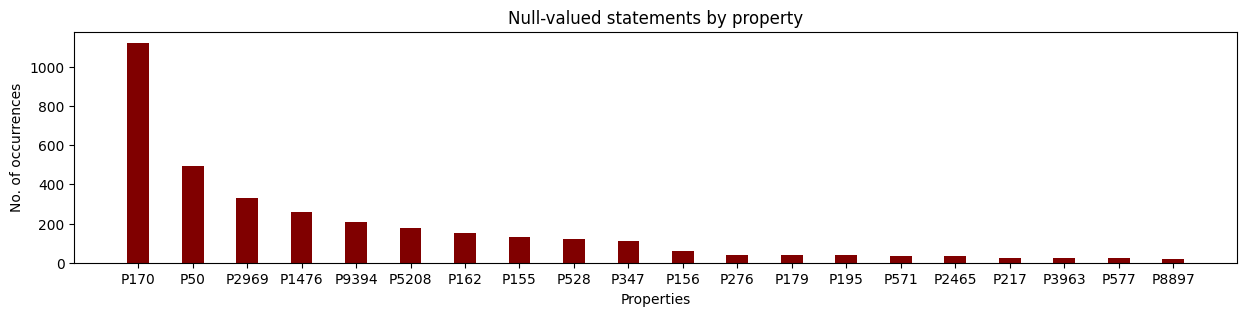

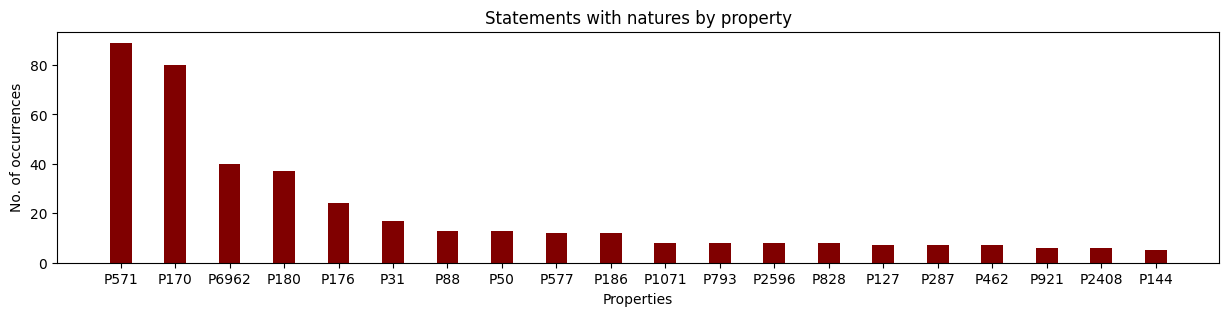

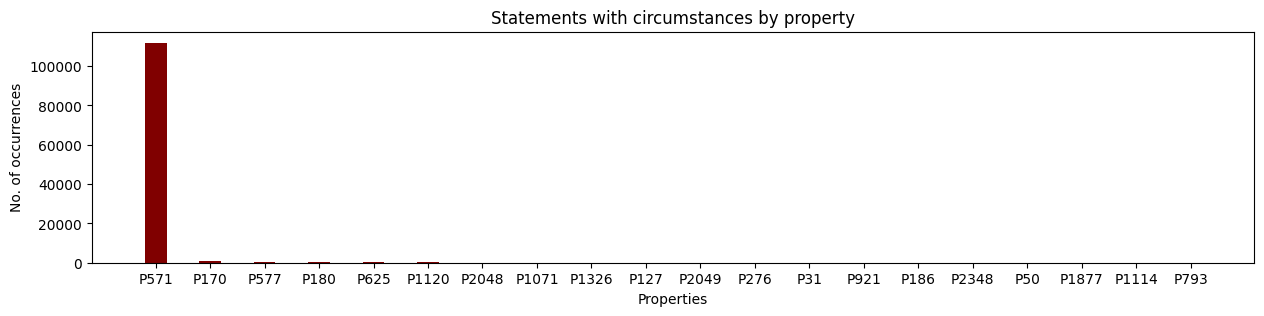

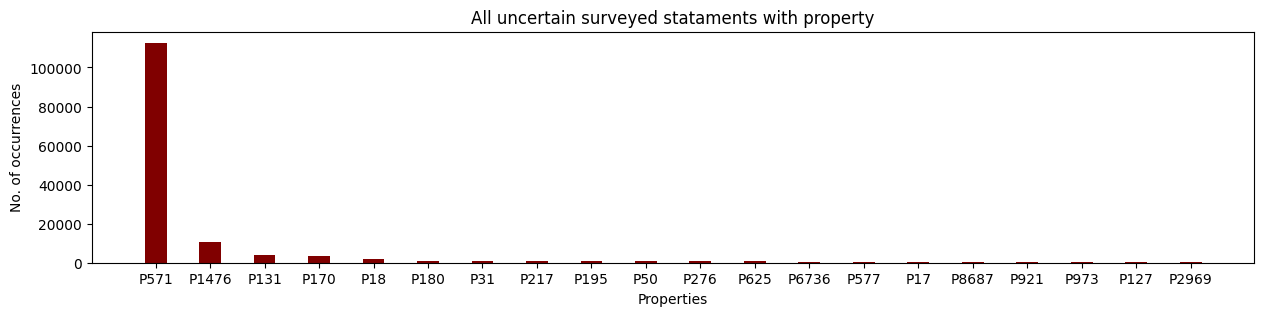

In [23]:
def most_common_prop_barchart(prop_list, label):
    
    prop_count = Counter(prop_list).most_common(20) 
    
    p = [x[0] for x in prop_count]
    v = [x[1] for x in prop_count]
    
    fig = plt.figure(figsize = (15, 3))

    plt.bar(p, v, color ='maroon',
            width = 0.4)

    plt.xlabel("Properties")
    plt.ylabel("No. of occurrences")
    plt.title(label)
    plt.show()
    
    return prop_count

#tot_most_common_prop = most_common_prop_barchart(all_properties_count, "Overall statements by property")
na_most_common_prop = most_common_prop_barchart(na_properties_list, "Non asserted statements by property")
nad_most_common_prop =  most_common_prop_barchart(deprecated_prop_list, "Deprecated ranked statements by property")
nan_most_common_prop =  most_common_prop_barchart(normal_prop_list, "Normal ranked statements by property")
nv_most_common_prop = most_common_prop_barchart(nv_properties_list, "Null-valued statements by property")
ns_most_common_prop = most_common_prop_barchart(ns_properties_list, "Statements with natures by property")
nc_most_common_prop = most_common_prop_barchart(nc_properties_list, "Statements with circumstances by property")

unc_properties_list = []
unc_properties_list.extend(na_properties_list)
unc_properties_list.extend(nv_properties_list)
unc_properties_list.extend(ns_properties_list)
unc_properties_list.extend(nc_properties_list)

nc_most_common_prop = most_common_prop_barchart(unc_properties_list, "All uncertain surveyed stataments with property")


### Complex knowledge categorisation: Grouping properties

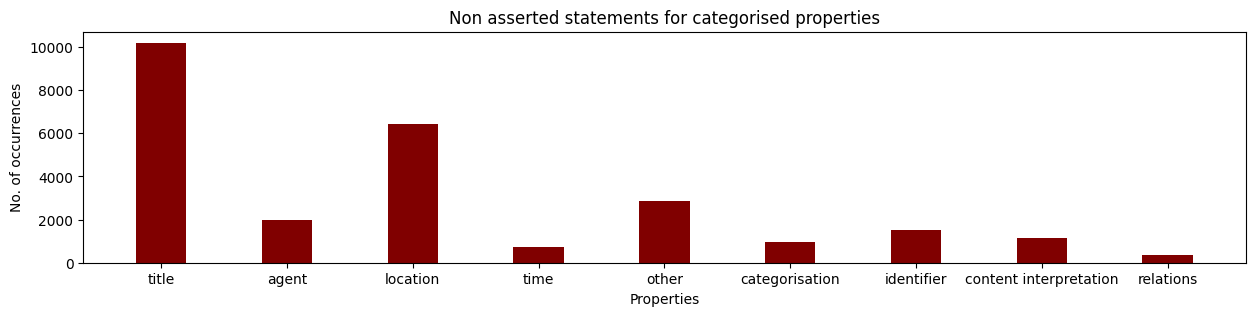

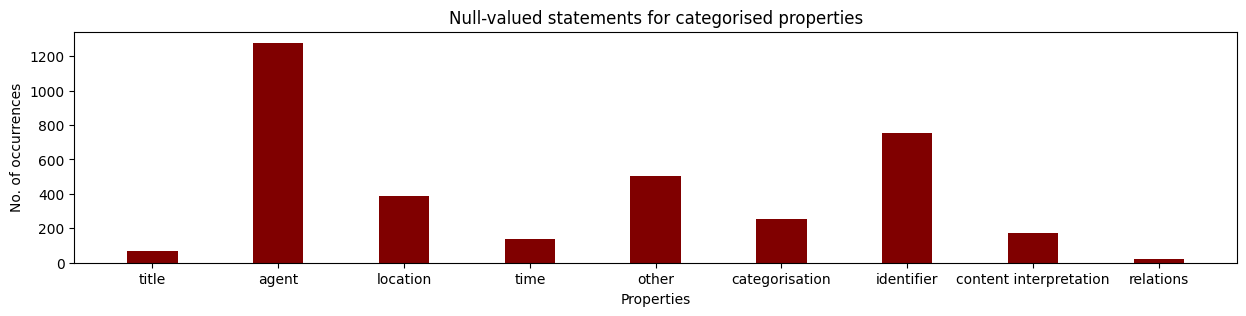

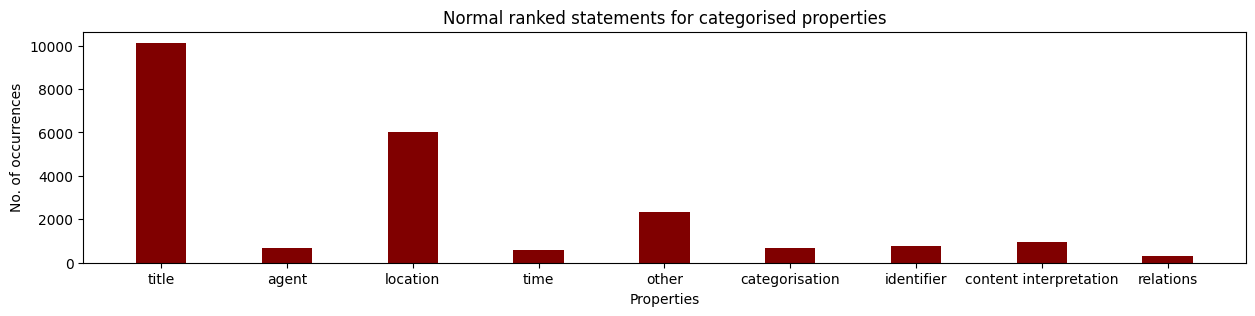

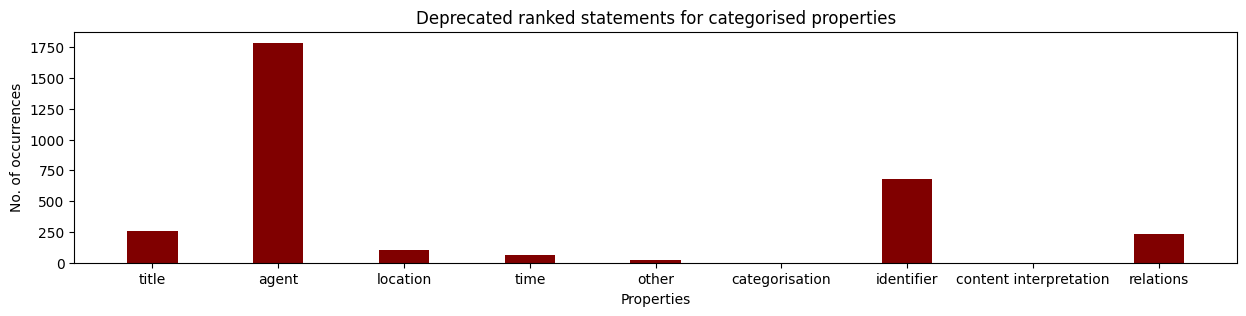

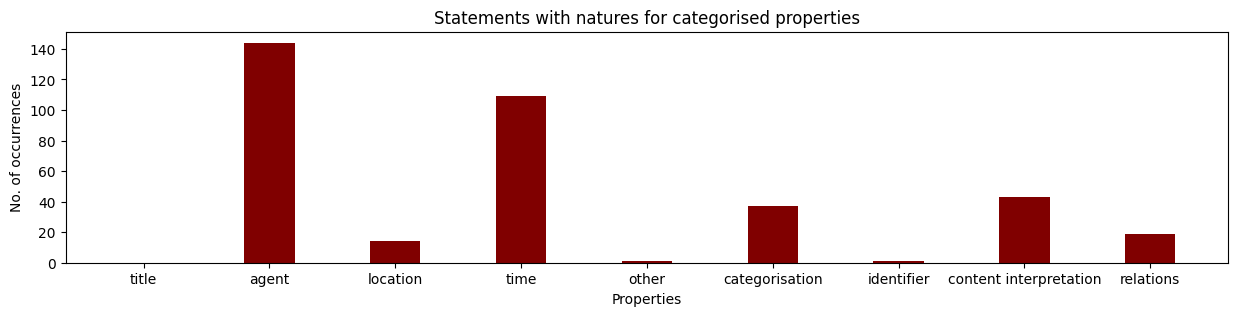

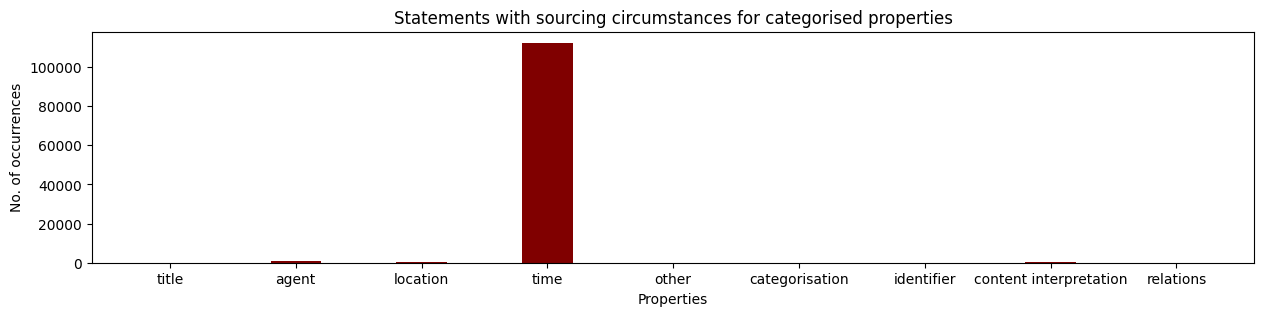

In [31]:
prop_categories = {
'title' : ['P1476'], 
'agent' : ['P170', 'P127', 'P50', 'P162', 'P176', 'P88', 'P287'],
'location' : ['P131', 'P195', 'P276', 'P17', 'P625', 'P1071'],
'time':['P571', 'P577', 'P2408', 'P580'],
'other': ['P18', 'P8687', 'P973', 'P364'],
'categorisation' : ['P31', 'P186', 'P2596'], 
'identifier': ['P217', 'P6736', 'P348', 'P345', 'P2962', 'P9394', 'P5208', 'P528', 'P347', 'P2465', 'P2364'],
'content interpretation': ['P180', 'P921'],
'relations' : ['P1433', 'P155', 'P156', 'P179', 'P793', 'P144']
}

def categorise_properties(properties_list, label):
    dct = {}
    n = 0
    for cat in prop_categories:
        for prop in properties_list:
            if prop in prop_categories[cat]:
                n += 1
        dct.update({cat:n})
        n = 0  
        
    p = [x for x in dct]
    v = [dct[x] for x in dct]

    fig = plt.figure(figsize = (15, 3))

    plt.bar(p, v, color ='maroon',
            width = 0.4)

    plt.xlabel("Properties")
    plt.ylabel("No. of occurrences")
    plt.title(label)
    plt.show()

    return dct

na_prop_cat = categorise_properties(na_properties_list, 'Non asserted statements for categorised properties')
nad_prop_cat = categorise_properties(deprecated_prop_list, 'Null-valued statements for categorised properties')
nan_prop_cat = categorise_properties(normal_prop_list, 'Normal ranked statements for categorised properties')
nv_prop_cat = categorise_properties(nv_properties_list, 'Deprecated ranked statements for categorised properties')
ns_prop_cat = categorise_properties(ns_properties_list, 'Statements with natures for categorised properties')
nc_prop_cat = categorise_properties(nc_properties_list, 'Statements with sourcing circumstances for categorised properties')

### Complex knowledge categorisation: Defining complex knowledge types

#### Evolving Knowledge

In [34]:
na_sel_props = {
    'title' : [], 
    'places' : ['P131', 'P195', 'P276', 'P6736', 'P17', 'P625', 'P6375'],
    'agents in roles' : ['P1433'],
    'time' : [],
    'identifiers' : ['P217', 'P973', 'P856', 'P2966', 'P1371', 'P1216', 'P648', 'P243', 'P212', 'P2969'], 
    'interpretations' : [],
    'categorisations' : [],
    'relations' : [],
    'other' : ['P18'] 
}

na_pref_version_props = {
    'title' : ['P1476'], 
    'places' : [],
    'agents in roles' : [],
    'time' : ['P9394', 'P5208', 'P528', 'P347', 'P156', 'P2364', 'P2465'],
    'identifiers' : [], 
    'interpretations' : [],
    'categorisations' : [],
    'relations' : [],
    'other' : [] 
}

 #### Incomplete knowledge (missing objects)

In [35]:
nv_incomplete_props = {
    'title': [], 
    'places' : ['P276', 'P195'],
    'agents in roles' : [], #P170 e P50 ma non servono perchè gia in ns_sel_props
    'time' : [], #P571 e P577  ma non servono perchè gia in ns_sel_props
    'identifiers' : [], 
    'interpretations' : [],
    'categorisations' : [],
    'relations' : [],
    'other' : []
    }

nv_progr_inserted_props = {
    'title' : ['P1476'],
    'places' : [],
    'agents in roles' : [],
    'time': [],
    'identifiers' : ['P9394', 'P5208', 'P528', 'P347', 'P156', 'P2364', 'P2465'], 
    'interpretations' : [],
    'categorisations' : [],
    'relations' : [],
    'other': []}

#### Actual debate or uncertainty

In [36]:
# debate and uncertainty --> 15 most common

ns_sel_props = {
    'title' : [],
    'places' : ['P1071'],
    'agents in roles' : ['P170', 'P176', 'P88', 'P50', 'P287'],
    'time' : ['P571', 'P577', 'P2408'],
    'identifiers' : [],
    'interpretations' : ['P180', 'P921'],
    'categorisations' : ['P31', 'P136'],
    'relations' : ['P793', 'P144'],
    'other' : []
}
                     
na_sel_props = {
    'title' : ['P1476'], 
    'places' : ['P131', 'P195', 'P276', 'P6736', 'P17', 'P625', 'P6375'],
    'agents in roles' : ['P1433'],
    'time' : ['P9394', 'P5208', 'P528', 'P347', 'P156', 'P2364', 'P2465'],
    'identifiers' : ['P217', 'P973', 'P856', 'P2966', 'P1371', 'P1216', 'P648', 'P243', 'P212', 'P2969', 'P9394', 'P5208', 'P528', 'P347', 'P156', 'P2364', 'P2465'], 
    'interpretations' : [],
    'categorisations' : [],
    'relations' : [],
    'other' : ['P18'] 
}                     

In [37]:
def categorise_props(data, categorised_properties):
    res = []
    for k,v in categorised_properties.items():
        value = 0
        t = tuple()
        for x in data:
            if x[0] in v:
                value += x[1]
                t = (k, value)
        if value == 0:
            t = (k,0)
        res.append(t)
    return res

# searching uncertainty and debate in all datasets
ns1 = categorise_props(na_most_common_prop, ns_sel_props)
ns2 = categorise_props(nv_most_common_prop, ns_sel_props)
ns3 = categorise_props(nv_most_common_prop, ns_sel_props)
# searching for incomplete information in nv
nv_incomplete = categorise_props(nv_most_common_prop, nv_incomplete_props)
# searching for programmatically inserted blank nodes
nv_authomatic = categorise_props(nv_most_common_prop, nv_progr_inserted_props)
# searching for evolving knowledge
na1 = categorise_props(na_most_common_prop, na_sel_props)
# searching for preferred version
na_preferred_v = categorise_props(na_most_common_prop, na_pref_version_props)

# group data by category

unc_partial = [(x[0], x[1] + y[1]) for x, y in zip(ns1, ns2)]
unc_partial2 = [(x[0], x[1] + y[1]) for x, y in zip(unc_partial, ns3)]
uncertainty = [(x[0], x[1] + y[1]) for x, y in zip(unc_partial2, nv_incomplete)]

evolving_knowledge = na1

conv_from_reldb = nv_authomatic

preferred_version = na_preferred_v 

In [38]:
def categorise_props(data, categorised_properties):
    res = []
    for k,v in categorised_properties.items():
        value = 0
        t = tuple()
        for x in data:
            if x[0] in v:
                value += x[1]
                t = (k, value)
        if value == 0:
            t = (k,0)
        res.append(t)
    return res

# searching uncertainty and debate in all datasets
ns1 = categorise_props(na_most_common_prop, ns_sel_props)
ns2 = categorise_props(nv_most_common_prop, ns_sel_props)
ns3 = categorise_props(nv_most_common_prop, ns_sel_props)
# searching for incomplete information in nv
nv_incomplete = categorise_props(nv_most_common_prop, nv_incomplete_props)
# searching for programmatically inserted blank nodes
nv_authomatic = categorise_props(nv_most_common_prop, nv_progr_inserted_props)
# searching for evolving knowledge
na1 = categorise_props(na_most_common_prop, na_sel_props)
# searching for preferred version
na_preferred_v = categorise_props(na_most_common_prop, na_pref_version_props)

# gropu data by category

unc_partial = [(x[0], x[1] + y[1]) for x, y in zip(ns1, ns2)]
unc_partial2 = [(x[0], x[1] + y[1]) for x, y in zip(unc_partial, ns3)]
uncertainty = [(x[0], x[1] + y[1]) for x, y in zip(unc_partial2, nv_incomplete)]

evolving_knowledge = na1

conv_from_reldb = nv_authomatic

preferred_version = na_preferred_v 

In [40]:
types_of_debate = []
types_of_debate.append(uncertainty)
types_of_debate.append(evolving_knowledge)
types_of_debate.append(conv_from_reldb )
types_of_debate.append(preferred_version)

def categorised_uncertainties(types_of_debate, keyword):
    lista = []
    for unc_type in types_of_debate:
        for x in unc_type:
            if keyword == x[0]:
                lista.append(x[1])
    return lista

title = categorised_uncertainties(types_of_debate, 'title')
location = categorised_uncertainties(types_of_debate, 'places')
author = categorised_uncertainties(types_of_debate, 'agents in roles')
time = categorised_uncertainties(types_of_debate, 'time')
ids = categorised_uncertainties(types_of_debate, 'identifiers')
categorisation = categorised_uncertainties(types_of_debate, 'categorisations')
interpretation = categorised_uncertainties(types_of_debate, 'interpretations')
relation = categorised_uncertainties(types_of_debate, 'relations')

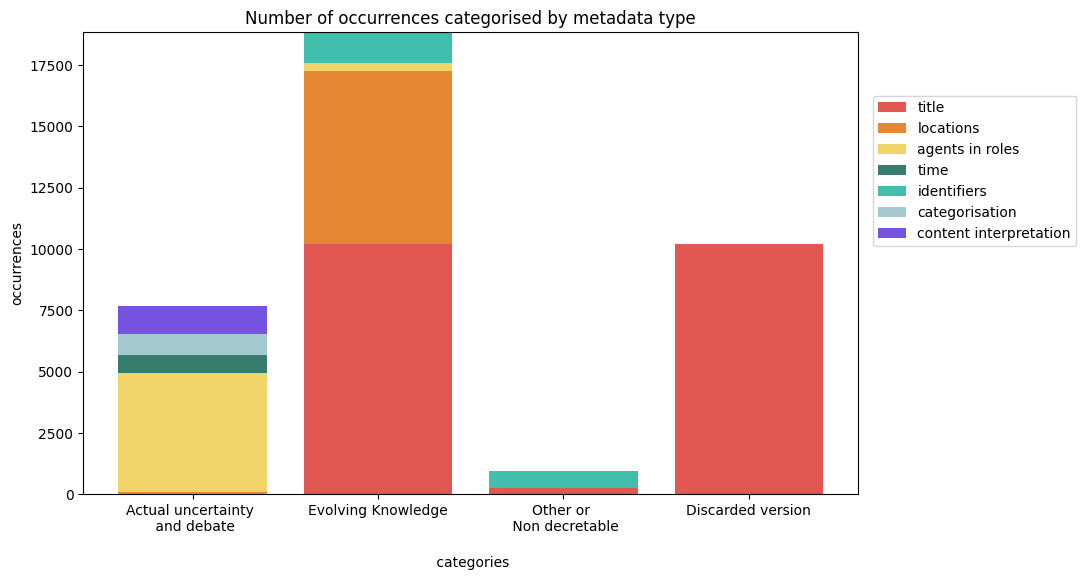

In [41]:
l1, l2, l3, l4, l5, l6 = [], [], [], [], [], []

x = 0
while x < len(title):
    l1.append(int(title[x] + location[x]))
    l2.append(int(title[x] + location[x]) + author[x])
    l3.append(int(title[x] + location[x]) + author[x] + time[x])
    l4.append(int(title[x] + location[x]) + author[x] + time[x] + ids[x])
    l5.append(int(title[x] + location[x]) + author[x] + time[x] + ids[x] + categorisation[x])
    #l6.append(int(title[x] + location[x]) + author[x] + time[x] + ids[x] + categorisation[x] + interpretation[x])
    x+=1
    
colors = ['#E35753', '#E78733', '#F0D468', '#367D6F', '#42BFAC', '#A4C9D0', '#7552DF', '#4659DC', '#387DD3']    
bars_labels = ['Actual uncertainty \n and debate', 'Evolving Knowledge', 'Other or \n Non decretable', 'Discarded version'] 

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(len(title)), title, align='center', color=colors[0])
plt.bar(range(len(location)), location, bottom=title, align='center', color=colors[1]) #azzurro
plt.bar(range(len(author)), author, bottom=l1, align='center', color=colors[2]) 
plt.bar(range(len(time)), time, bottom=l2, align='center', color=colors[3]) #azzurro
plt.bar(range(len(ids)), ids, bottom=l3, align='center', color=colors[4])
plt.bar(range(len(categorisation)), categorisation, bottom=l4, align='center', color=colors[5])
plt.bar(range(len(interpretation)), interpretation, bottom=l5, align='center', color=colors[6])
#plt.bar(range(len(relation)), relation, bottom=l6, align='center', color=colors[7]) 

plt.xticks(range(len(bars_labels)), bars_labels)
ax.set_title('Number of occurrences categorised by metadata type')
ax.set_xlabel('\n categories')
ax.set_ylabel('occurrences')
labels_set = ['title', 'locations', 'agents in roles', 'time', 'identifiers', 'categorisation', 'content interpretation', 'relations with other entities']
plt.legend(labels_set,loc='center left', bbox_to_anchor=(1.01, 0.7))
plt.show()